In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [51]:
data = np.loadtxt("SDEsolution.txt")

ValueError: x and y must have same first dimension, but have shapes (100000,) and (0,)

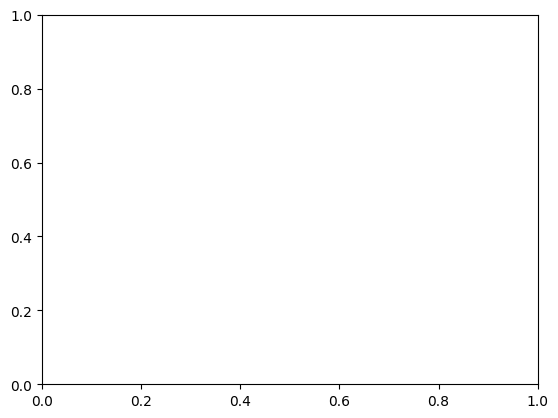

In [52]:
tau = 1e-4
Twnd = 10.
T = np.arange(0, Twnd, tau)
chunksz = round(Twnd/tau)
stch = 4
plt.plot(T, data[(chunksz*stch):(chunksz*(stch+1)),0], T, data[(chunksz*stch):(chunksz*(stch+1)),1])

In [53]:
Ep = data[:, 0] * np.exp(1j*(data[:,2] + data[:,3]))
Em = data[:, 1] * np.exp(1j*(data[:,2] - data[:,3]))
Ex = (Ep + Em) / np.sqrt(2)
Ey = (Ep - Em) / np.sqrt(2) / 1j

In [54]:
specsx = []
specsy = []
for i in range(1):
    specsx.append(np.abs(np.fft.fftshift(np.fft.fft(Ex[round(0.2*chunksz*i):round(0.2*chunksz*i)+chunksz])))**2)
    specsy.append(np.abs(np.fft.fftshift(np.fft.fft(Ey[round(0.2*chunksz*i):round(0.2*chunksz*i)+chunksz])))**2)
powspecx = np.mean(specsx, axis=0)
powspecy = np.mean(specsy, axis=0)

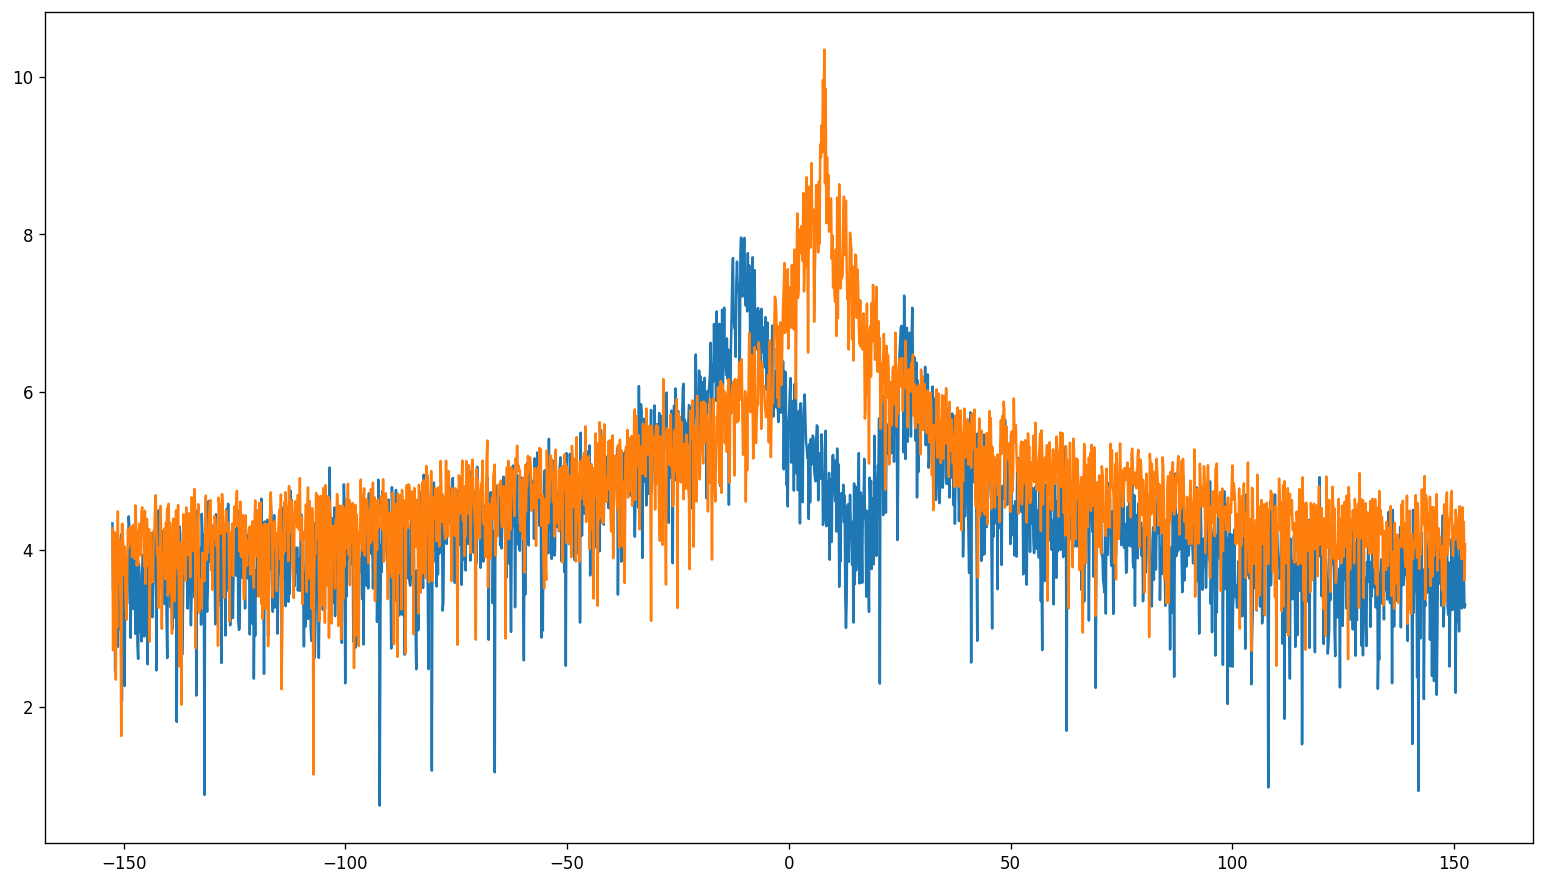

In [57]:
freqs = np.linspace(-1/2/tau, 1/2/tau, 2**16)

plt.figure(figsize=(16,9), dpi=120)
WW = 1000
wnd = np.arange(round(freqs.shape[0]/2)-WW, round(freqs.shape[0])/2+WW, dtype=int)
plt.plot(freqs[wnd], np.log10(powspecx[wnd]), freqs[wnd], np.log10(powspecy[wnd]))
plt.show()

In [36]:
np.savetxt("pytonSpec.txt", np.transpose([freqs, powspecx, powspecy]))

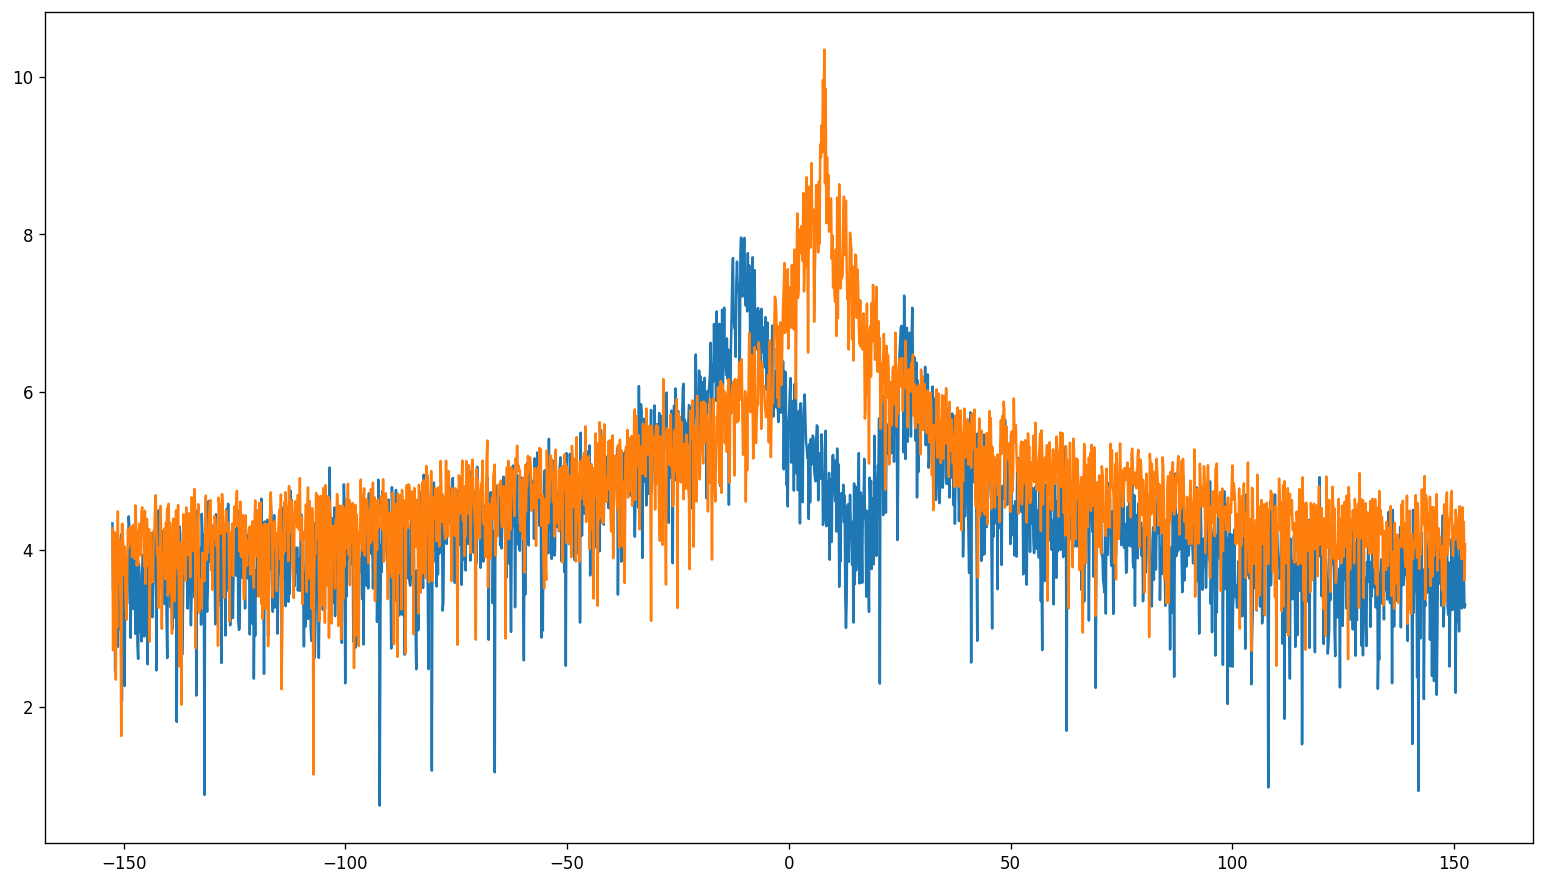

In [56]:
freqs = np.linspace(-1/2/tau, 1/2/tau, 2**16)

plt.figure(figsize=(16,9), dpi=120)
WW = 1000
wnd = np.arange(round(freqs.shape[0]/2)-WW, round(freqs.shape[0])/2+WW, dtype=int)
plt.plot(freqs[wnd], np.log10(powspecx[wnd]), freqs[wnd], np.log10(powspecy[wnd]))
plt.show()

In [39]:
specs = np.loadtxt("SDEspec.txt")

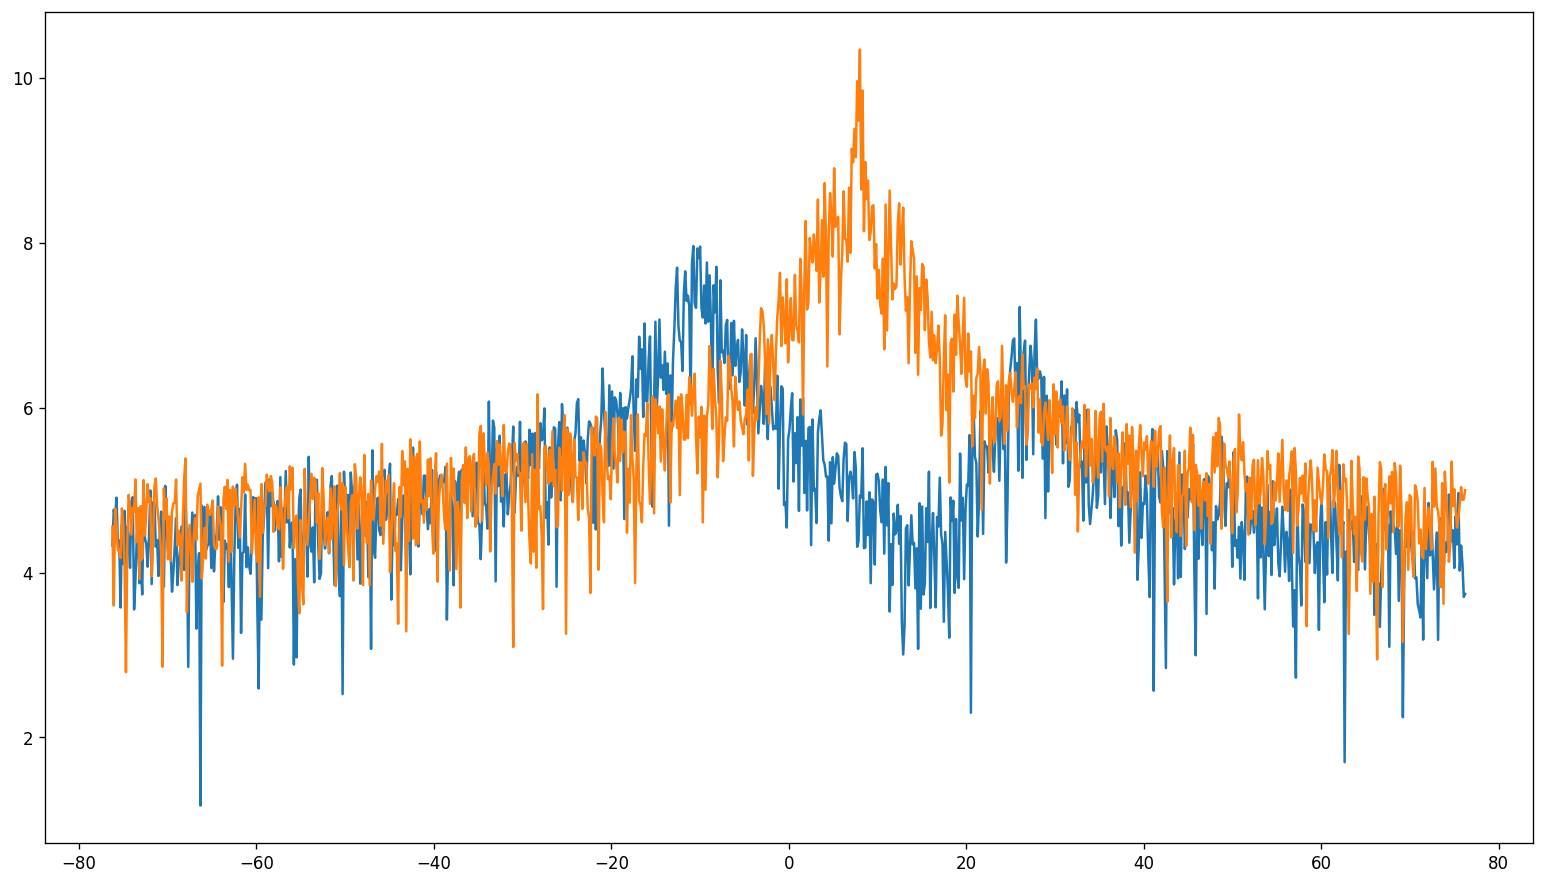

In [50]:
freqs = np.linspace(-1/2/tau, 1/2/tau, 2**16)
WW = 500
wnd = np.arange(round(freqs.shape[0]/2)-WW, round(freqs.shape[0])/2+WW, dtype=int)
plt.figure(figsize=(16,9), dpi=120)
plt.plot(freqs[wnd], np.log10(np.fft.fftshift(specs[:,0])[wnd]), freqs[wnd], np.log10(np.fft.fftshift(specs[:,1])[wnd]))
plt.show()

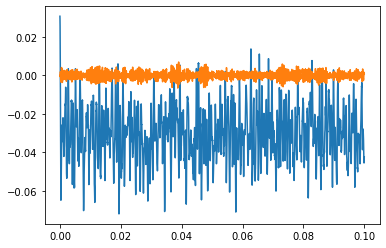

In [18]:
plt.plot(T, data[:,4]-1,T, data[:,5])

In [9]:
N = 1000000
smpl = 2*np.random.random(N)-1
smpl2 = 2*np.random.random(N)-1
R = np.sum(smpl2) / np.sqrt(N/3)
sqsum = np.sum(smpl**2)
out = smpl/np.sqrt(sqsum) * R

(array([ 99891., 100159.,  99896.,  99422., 100143.,  99862., 100359.,
         99734., 100372., 100162.]),
 array([-2.87735421e-03, -2.30188320e-03, -1.72641218e-03, -1.15094116e-03,
        -5.75470142e-04,  8.76311278e-10,  5.75471894e-04,  1.15094291e-03,
         1.72641393e-03,  2.30188495e-03,  2.87735597e-03]),
 <BarContainer object of 10 artists>)

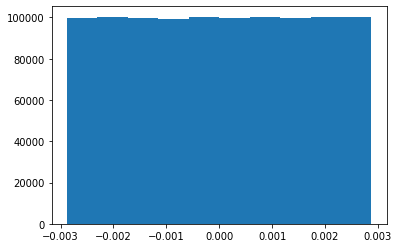

In [24]:
plt.hist(out)

In [22]:
R

1.8610702304524358

In [17]:
stattest = np.loadtxt("SDErandom.txt")

In [18]:
stattest.shape

(10000000, 4)

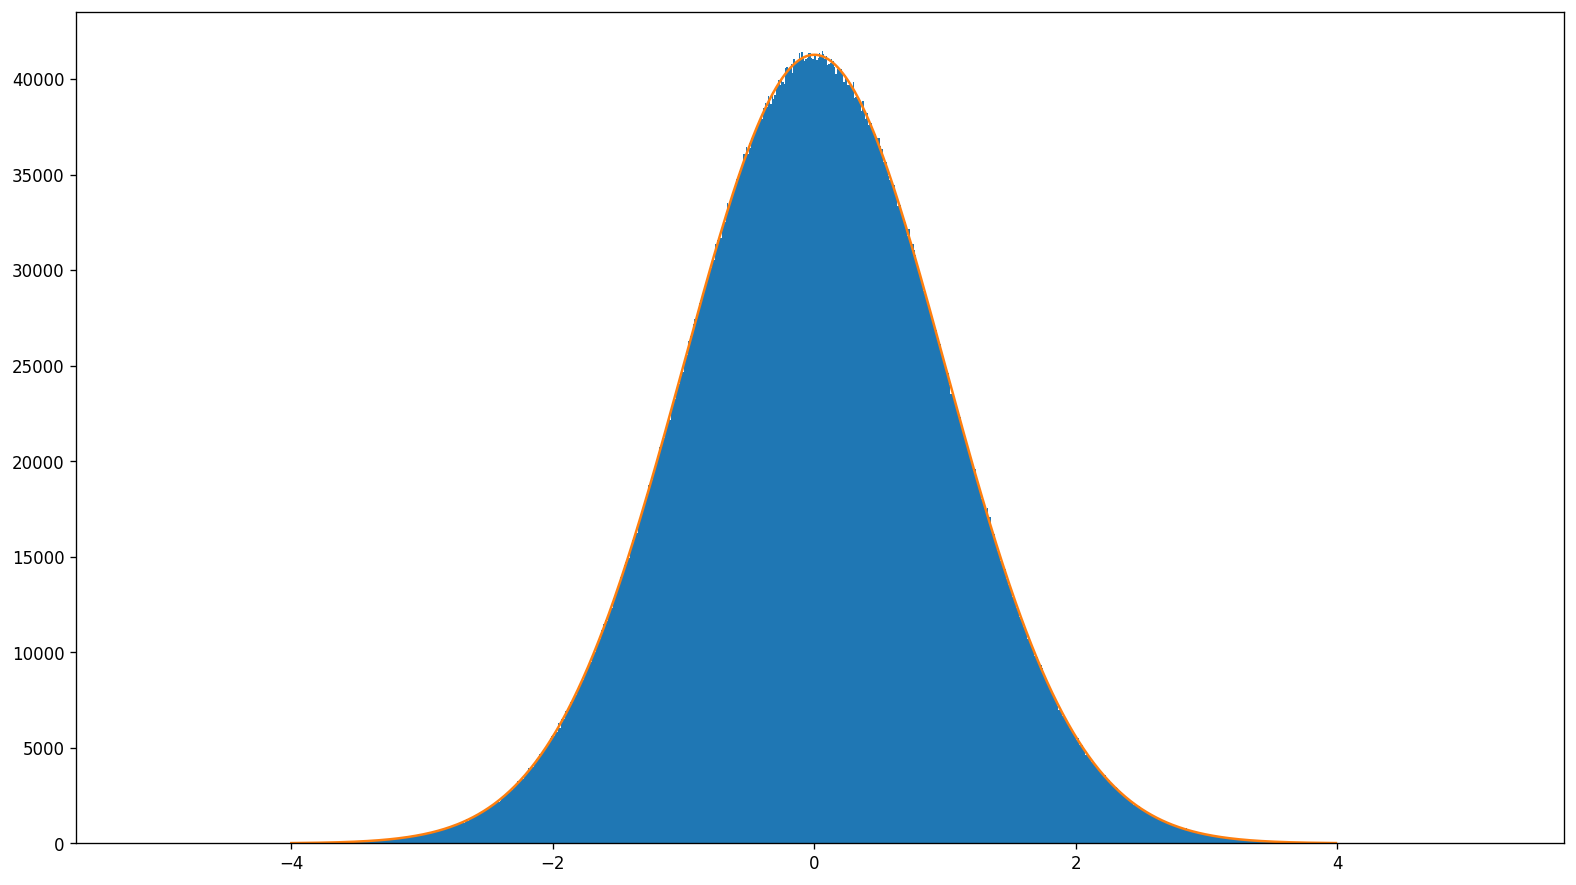

In [21]:
plt.figure(figsize=(16,9), dpi=120)
a,b,_ = plt.hist(stattest[:,2], bins=1000)
x = np.arange(-4., 4., 0.01)
y = stattest.shape[0]*(b[1]-b[0])/np.sqrt(np.pi*2)*np.exp(-x**2/2)
plt.plot(x,y)
plt.show()

In [4]:
corr = np.correlate(stattest[0:10000], stattest[0:10000],"same")

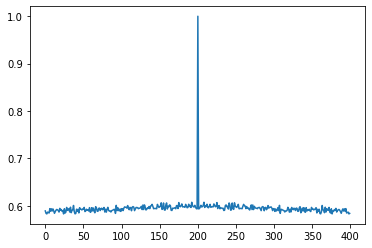

In [8]:
plt.plot(corr[4800:5200]/np.max(corr))

In [38]:
arr = [1, 2, 1, 2, 1, 2, 1, 2]
arr = np.arange(1,17)
np.fft.fft(arr)

array([136. +0.j        ,  -8.+40.21871594j,  -8.+19.3137085j ,
        -8.+11.9728461j ,  -8. +8.j        ,  -8. +5.3454291j ,
        -8. +3.3137085j ,  -8. +1.59129894j,  -8. +0.j        ,
        -8. -1.59129894j,  -8. -3.3137085j ,  -8. -5.3454291j ,
        -8. -8.j        ,  -8.-11.9728461j ,  -8.-19.3137085j ,
        -8.-40.21871594j])